In [58]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report
import re
from pylab import *
import statistics

%matplotlib inline

1. Загрузить файл hr.csv.

In [95]:
df = pd.read_csv('hr.csv', low_memory=False, decimal=',')

In [98]:
df = df.dropna()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.8,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).


In [60]:
print(df.describe())
print('_____________________')
print('Мода:')
print('satisfaction_level: ', statistics.mode(df['satisfaction_level']))
print('last_evaluation: ', statistics.mode(df['last_evaluation']))
print('number_project: ', statistics.mode(df['number_project']))
print('time_spend_company: ', statistics.mode(df['time_spend_company']))

       number_project  average_montly_hours  time_spend_company  \
count    14999.000000          14999.000000        14999.000000   
mean         3.803054            201.050337            3.498233   
std          1.232592             49.943099            1.460136   
min          2.000000             96.000000            2.000000   
25%          3.000000            156.000000            3.000000   
50%          4.000000            200.000000            3.000000   
75%          5.000000            245.000000            4.000000   
max          7.000000            310.000000           10.000000   

       Work_accident          left  promotion_last_5years  
count   14999.000000  14999.000000           14999.000000  
mean        0.144610      0.238083               0.021268  
std         0.351719      0.425924               0.144281  
min         0.000000      0.000000               0.000000  
25%         0.000000      0.000000               0.000000  
50%         0.000000      0.000000  

3. Рассчитать и визуализировать корреляционную матрицу для переменных.


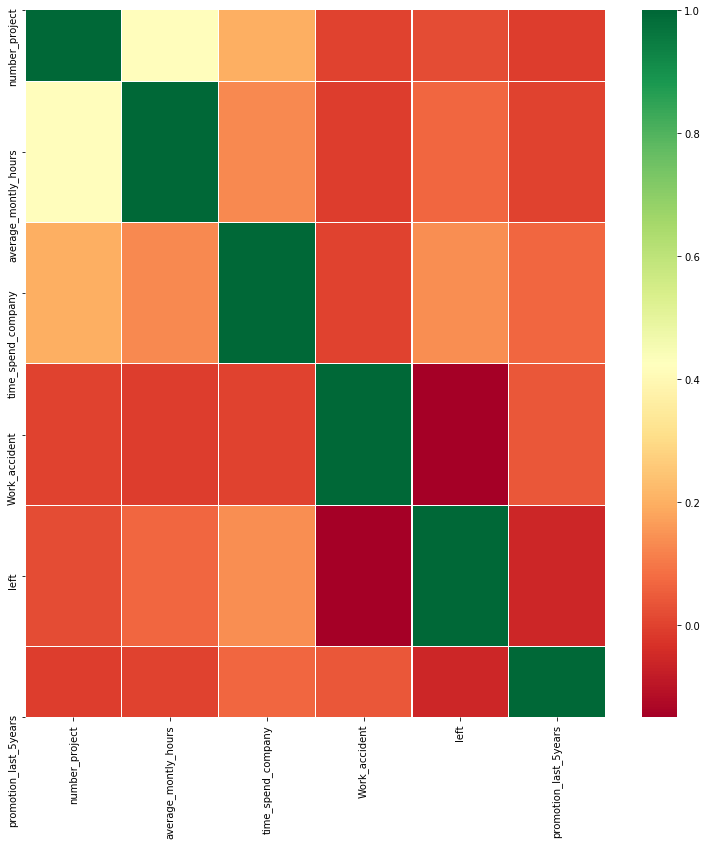

In [99]:
from sklearn import preprocessing

f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

4. Визуализировать несколько взаимосвязей между переменными.


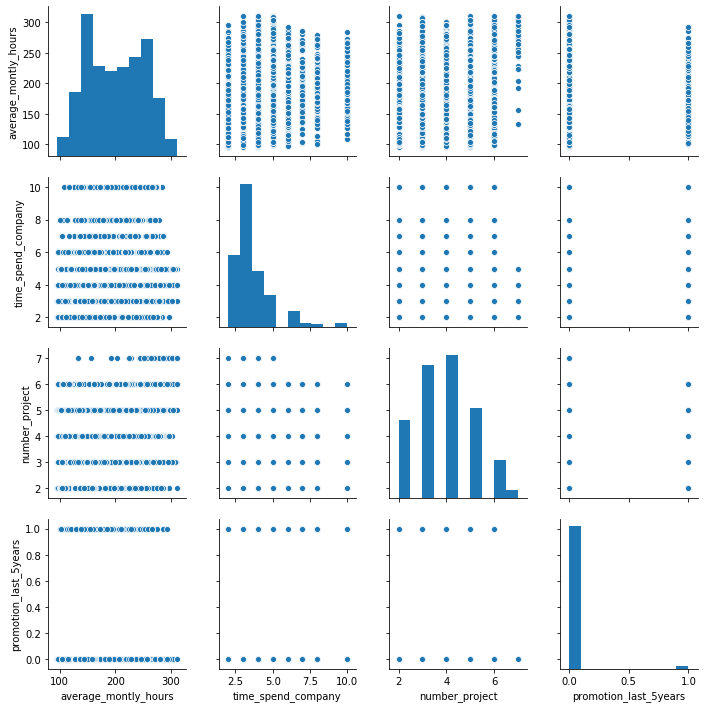

In [100]:
data = df.filter(items = ['average_montly_hours', 'time_spend_company', 'number_project', 'promotion_last_5years'])

g = sns.pairplot(data)

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


In [101]:
stats.ttest_ind(df.average_montly_hours, df.time_spend_company)
# p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами

Ttest_indResult(statistic=484.23011415607965, pvalue=0.0)

In [102]:
stats.ttest_ind(df.left, df.Work_accident)
# нет статистического различия между атрибутами

Ttest_indResult(statistic=20.724471296371643, pvalue=9.625063899986344e-95)

6. Рассчитать сколько работников работает в каждом департаменте.


In [103]:
df.groupby('sales').count()['satisfaction_level']

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

7. Показать распределение сотрудников по зарплатам.


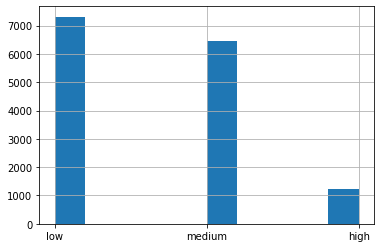

In [104]:
df['salary'].hist()

8. Показать распределение сотрудников по зарплатам совместно с департаментами.


['IT']


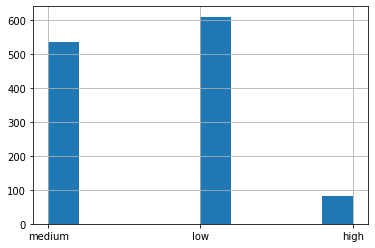

['RandD']


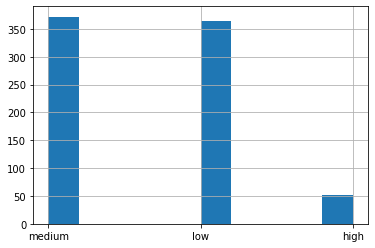

['accounting']


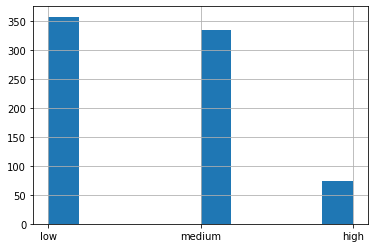

['hr']


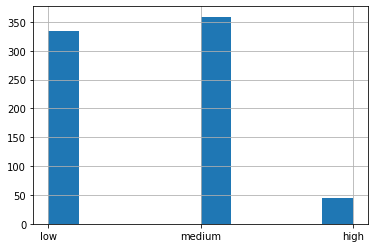

['management']


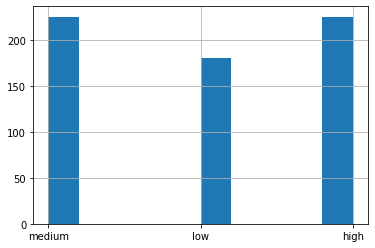

['marketing']


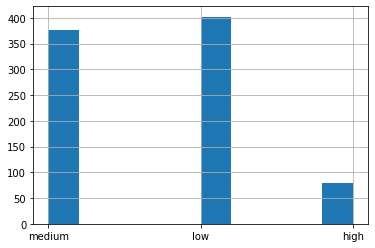

['product_mng']


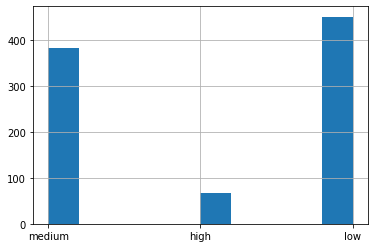

['sales']


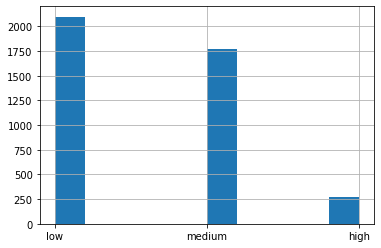

['support']


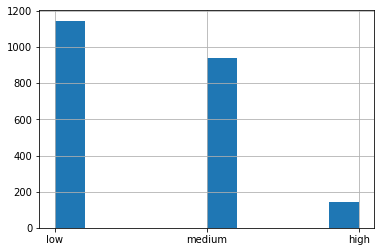

['technical']


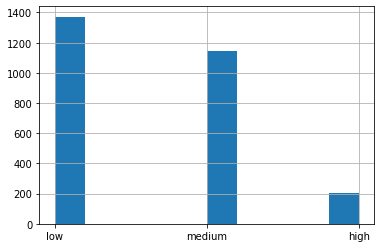

""


In [105]:
def graph(data):
    print(data.sales.unique())
    show(data.salary.hist())
        
df.groupby('sales').apply(graph)

9. Cколько сотрудников покинули компанию.


In [106]:
len(df[ df['left'] == 1 ])

3571

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [119]:
# Проверим гипотезу, что чаще уходят с работы те, кто не получал повышение последние 5 лет

pl5_low = df[df['promotion_last_5years'] != 1].left
pl5_high = df[df['promotion_last_5years'] == 1].left

descriptives, results = rp.ttest(pl5_low, pl5_high)

print(descriptives)
print('_______________________________________')
print(results)

print(stats.ttest_ind(pl5_low, pl5_high))

# наша гипотеза верна ввиду большего среднего у первой выборки

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
1      left    319.0  0.059561  0.237044  0.013272   0.033449  0.085673
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1824
1        Degrees of freedom =   14997.0000
2                         t =       7.5812
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.4291
7                 Hedge's g =       0.4290
8             Glass's delta =       0.4259
9                         r =       0.0618
Ttest_indResult(statistic=7.581195349367636, pvalue=3.6240472241469694e-14)


In [122]:
# Проверим гипотезу, что чаще уходят с работы те, кто у кого была авария на работе

wa_low = df[df['Work_accident'] == 1].left
wa_high = df[df['Work_accident'] != 1].left

descriptives, results = rp.ttest(wa_low, wa_high)

print(descriptives)
print('_______________________________________')
print(results)

print(stats.ttest_ind(pl5_low, pl5_high))

# наша гипотеза верна ввиду больше среднего у первой выборки

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left  12830.0  0.265160  0.441435  0.003897   0.257521  0.272799
1      left   2169.0  0.077916  0.268101  0.005757   0.066627  0.089205
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1872
1        Degrees of freedom =   14997.0000
2                         t =      19.1658
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.4450
7                 Hedge's g =       0.4449
8             Glass's delta =       0.4242
9                         r =       0.1546
Ttest_indResult(statistic=7.581195349367636, pvalue=3.6240472241469694e-14)
